In [8]:
# Import Libraries
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Using ydata_profiling Library to provide fast, extended analysis of the dataframe by using one line of code (Requires-Python >=3.7, <3.11 as of now)
from ydata_profiling import ProfileReport

# Using the default style for plotting visualization
plt.style.use("default")

1. Read The Data and get informations and statistics

In [14]:
# Load the dataset
df = pd.read_csv("/kaggle/input/netflix-imdb-scores/Netflix TV Shows and Movies.csv")

# Show statistic and overview of the dataframe
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
# Display the dataframe
df

df_index         id                               title   type  \
0            0    tm84618                         Taxi Driver  MOVIE   
1            1   tm127384     Monty Python and the Holy Grail  MOVIE   
2            2    tm70993                       Life of Brian  MOVIE   
3            3   tm190788                        The Exorcist  MOVIE   
4            4    ts22164        Monty Python's Flying Circus   SHOW   
...        ...        ...                                 ...    ...   
5278      5278  tm1040816         Momshies! Your Soul is Mine  MOVIE   
5279      5279  tm1014599                           Fine Wine  MOVIE   
5280      5280  tm1045018                               Clash  MOVIE   
5281      5281  tm1098060                      Shadow Parties  MOVIE   
5282      5282   ts271048  Mighty Little Bheem: Kite Festival   SHOW   

                                            description  release_year  \
0     A mentally unstable Vietnam War veteran works ...          1976   
1     King Arthur, accompanied by his squire, recrui...          1975   
2     Brian Cohen is an average young Jewish man, bu...          1979   
3     12-year-old Regan MacNeil begins to adapt an e...          1973   
4     A British sketch comedy series with the shows ...          1969   
...                                                 ...           ...   
5278  Three women with totally different lives accid...          2021   
5279  A beautiful love story that can happen between...          2021   
5280  A man from Nigeria returns to his family in Ca...          2021   
5281  A family faces destruction in a long-running c...          2021   
5282  With winter behind them, Bheem and his townspe...          2021   

     age_certification  runtime     imdb_id  imdb_score  imdb_votes  
0                    R      113   tt0075314         8.3    795222.0  
1                   PG       91   tt0071853         8.2    530877.0  
2                    R       94   tt0079470         8.0    392419.0  
3                    R      133   tt0070047         8.1    391942.0  
4                TV-14       30   tt0063929         8.8     72895.0  
...                ...      ...         ...         ...         ...  
5278               NaN      108  tt14412240         5.8        26.0  
5279               NaN      100  tt13857480         6.9        39.0  
5280               NaN       88  tt14620732         6.5        32.0  
5281               NaN      116  tt10168094         6.2         9.0  
5282               NaN        0  tt13711094         8.8        16.0  

[5283 rows x 11 columns]

In [16]:
# Fill all NaN values
df['age_certification'] = df['age_certification'].fillna('Unknown')
df['imdb_votes'] = df['imdb_votes'].fillna(0)

In [17]:
# Remove unnecesary column.
df.drop(['id','df_index','description','imdb_id'],axis=1,inplace=True)

# Display the top rows
df.head()

title   type  release_year age_certification  \
0                      Taxi Driver  MOVIE          1976                 R   
1  Monty Python and the Holy Grail  MOVIE          1975                PG   
2                    Life of Brian  MOVIE          1979                 R   
3                     The Exorcist  MOVIE          1973                 R   
4     Monty Python's Flying Circus   SHOW          1969             TV-14   

   runtime  imdb_score  imdb_votes  
0      113         8.3    795222.0  
1       91         8.2    530877.0  
2       94         8.0    392419.0  
3      133         8.1    391942.0  
4       30         8.8     72895.0

2. Show and Plot how many Movies and TV Shows released every decades

In [18]:
# Number of Movies and TV Shows released every decades
df['decade'] = df['release_year'] //  10 * 10
num_items_decades = df.groupby(['decade', 'type']).agg({'title': 'count'}).reset_index()
num_items_decades = num_items_decades.sort_values(by=['decade', 'type', 'title'], ascending=[False, True, False]).reset_index(drop=True)
num_items_decades.rename(columns={'title': 'count'}, inplace=True)
num_items_decades

decade   type  count
0     2020  MOVIE    908
1     2020   SHOW    618
2     2010  MOVIE   2039
3     2010   SHOW   1133
4     2000  MOVIE    276
5     2000   SHOW     93
6     1990  MOVIE    105
7     1990   SHOW     21
8     1980  MOVIE     43
9     1980   SHOW      9
10    1970  MOVIE     20
11    1970   SHOW      1
12    1960  MOVIE     10
13    1960   SHOW      1
14    1950  MOVIE      6

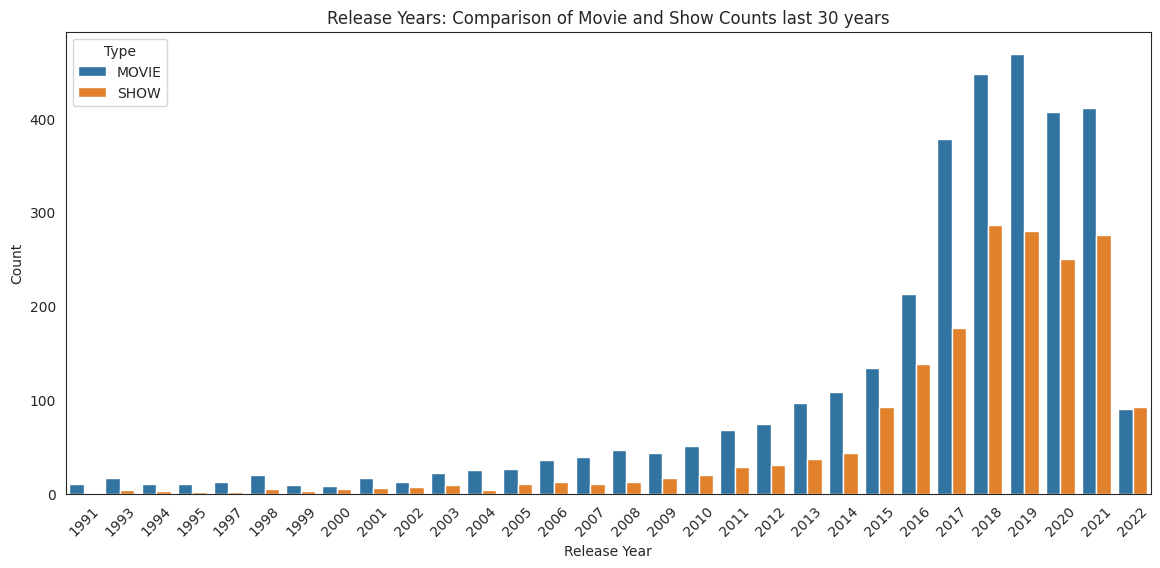

In [19]:
# Plotting with Seaborn countplot last 30 years
year = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)
top_n_years = year.assign(total=year.sum(axis=1)).nlargest(30, 'total').drop('total', axis=1)

sns.set_style("white")
plt.figure(figsize=(14, 6))
sns.countplot(data=df[df['release_year'].isin(top_n_years.index)], x='release_year', hue='type')

# Customize the plot
plt.title('Release Years: Comparison of Movie and Show Counts last 30 years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Type', loc='upper left')
plt.xticks(rotation=45)
plt.show()

3. Plot how many Movies and TV Shows based on their IMDB score

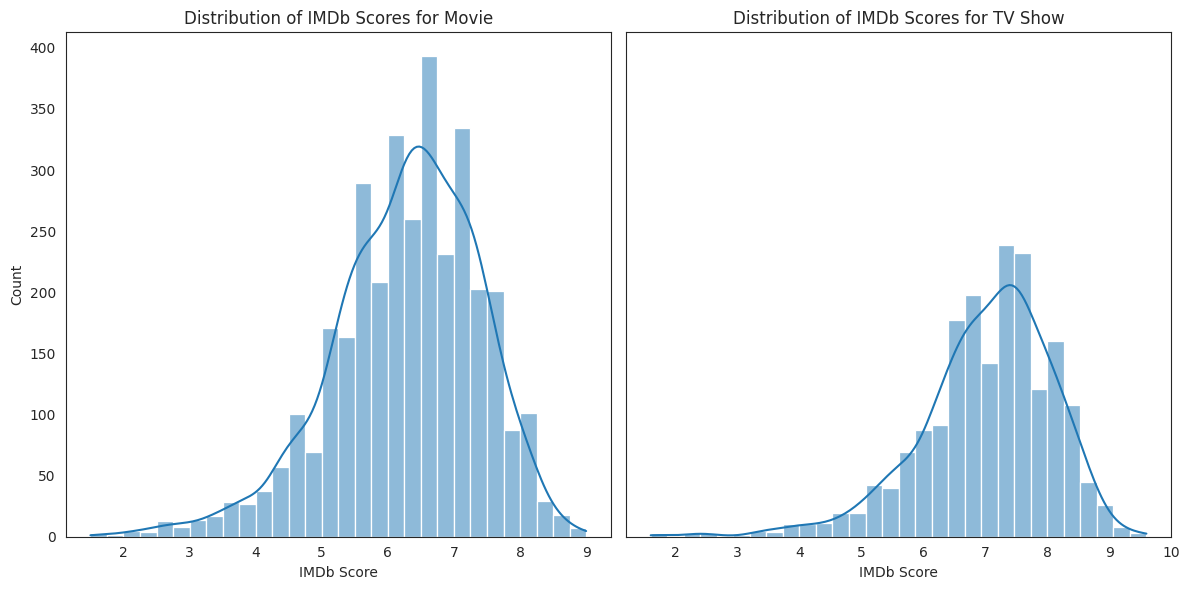

In [20]:
# Plotting with Seaborn histplot
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
sns.histplot(data=df[df['type'] == 'MOVIE'], x='imdb_score', bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of IMDb Scores for Movie')
axes[0].set_xlabel('IMDb Score')
axes[0].set_ylabel('Count')

sns.histplot(data=df[df['type'] == 'SHOW'], x='imdb_score', bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of IMDb Scores for TV Show')
axes[1].set_xlabel('IMDb Score')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

4. Plot the average IMDB Score of each Movies and Shows based on the release year

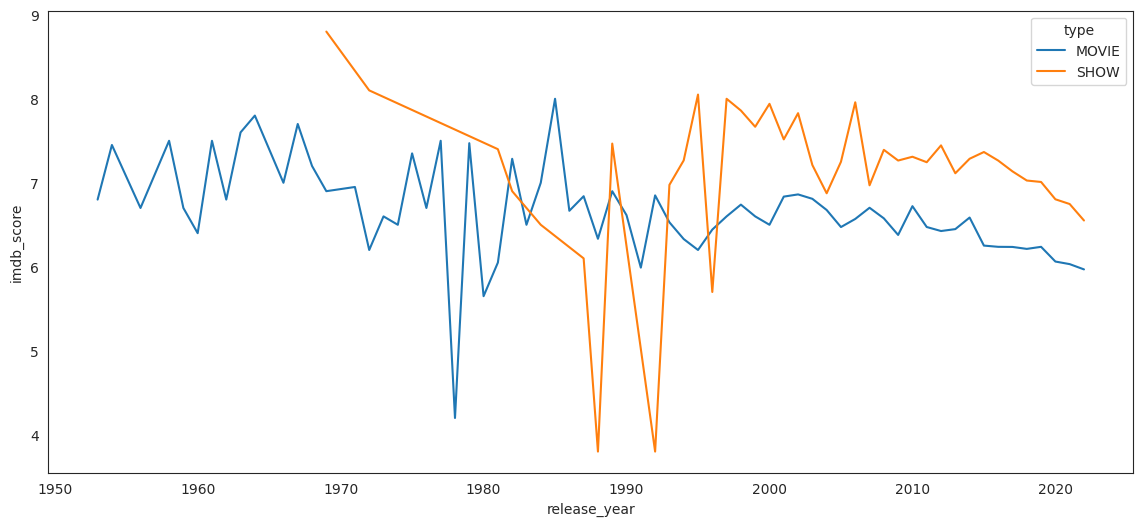

release_year   type  imdb_score
0            1953  MOVIE    6.800000
1            1954  MOVIE    7.450000
2            1956  MOVIE    6.700000
3            1958  MOVIE    7.500000
4            1959  MOVIE    6.700000
..            ...    ...         ...
101          2020   SHOW    6.803600
102          2021  MOVIE    6.031630
103          2021   SHOW    6.747101
104          2022  MOVIE    5.968889
105          2022   SHOW    6.551087

[106 rows x 3 columns]

In [23]:
# Plotting with Seaborn lineplot
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='release_year', y='imdb_score', hue='type', errorbar=None)
plt.show()

# Display the dataframe
avg_score_year = df.groupby(['release_year', 'type'])['imdb_score'].mean().reset_index()
avg_score_year

5. Show the top 10 highest rated movies and tv shows based with most IMDB votes

In [24]:
# Dataframe for Movies
df[df["type"]=="MOVIE"].sort_values(by=["imdb_votes", "imdb_score"], ascending=[False,False])[:10]

title   type  release_year age_certification  runtime  \
246                 Inception  MOVIE          2010             PG-13      148   
101              Forrest Gump  MOVIE          1994             PG-13      142   
662          Django Unchained  MOVIE          2012                 R      165   
104       Saving Private Ryan  MOVIE          1998                 R      169   
0                 Taxi Driver  MOVIE          1976                 R      113   
870        The Imitation Game  MOVIE          2014             PG-13      113   
48          Full Metal Jacket  MOVIE          1987                 R      116   
248  How to Train Your Dragon  MOVIE          2010                PG       98   
683   Silver Linings Playbook  MOVIE          2012                 R      122   
262        The Social Network  MOVIE          2010             PG-13      121   

     imdb_score  imdb_votes  decade  
246         8.8   2268288.0    2010  
101         8.8   1994599.0    1990  
662         8.4   1472668.0    2010  
104         8.6   1346020.0    1990  
0           8.3    795222.0    1970  
870         8.0    748654.0    2010  
48          8.3    723306.0    1980  
248         8.1    719717.0    2010  
683         7.7    697481.0    2010  
262         7.8    681286.0    2010

In [25]:
# Dataframe for TV Shows
df[df["type"]=="SHOW"].sort_values(by=["imdb_votes", "imdb_score"], ascending=[False,False])[:10]

title  type  release_year age_certification  runtime  \
229       Breaking Bad  SHOW          2008             TV-MA       48   
1145   Stranger Things  SHOW          2016             TV-14       52   
230   The Walking Dead  SHOW          2010             TV-MA       46   
660       Black Mirror  SHOW          2011             TV-MA       59   
883     House of Cards  SHOW          2013             TV-MA       52   
859     Peaky Blinders  SHOW          2013             TV-MA       58   
3016       The Witcher  SHOW          2019             TV-MA       58   
1740       Money Heist  SHOW          2017             TV-MA       50   
239       Supernatural  SHOW          2005             TV-14       45   
675              Arrow  SHOW          2012             TV-14       42   

      imdb_score  imdb_votes  decade  
229          9.5   1727694.0    2000  
1145         8.7    989090.0    2010  
230          8.2    945125.0    2010  
660          8.8    515577.0    2010  
883          8.7    494092.0    2010  
859          8.8    485506.0    2010  
3016         8.2    465949.0    2010  
1740         8.3    450797.0    2010  
239          8.5    428639.0    2000  
675          7.5    425716.0    2010

6. Show the correlation between IMDB Score and IMDB Votes for each movies and shows

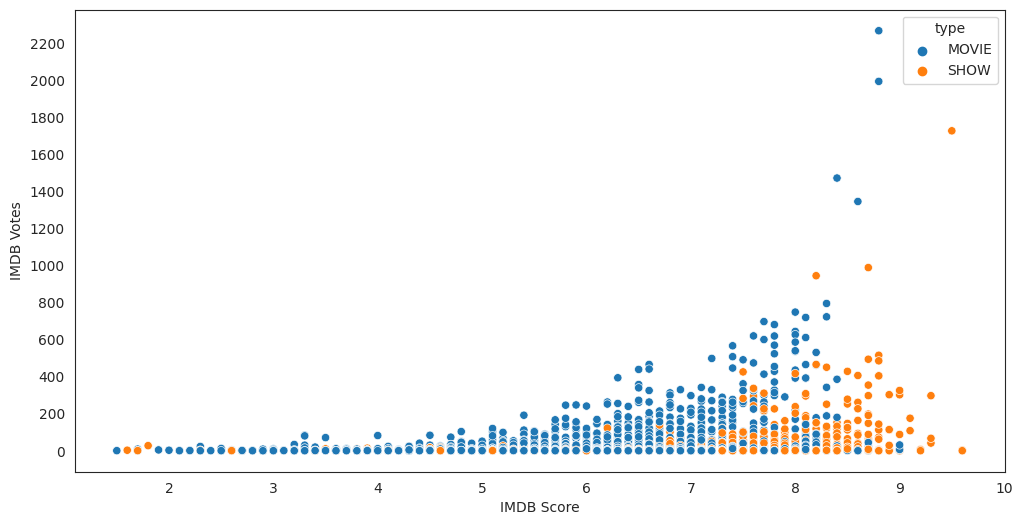

In [26]:
# Plotting with Seaborn scatterplot
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='imdb_score', y=df['imdb_votes']/1000, hue='type')
plt.yticks(range(0, int((df['imdb_votes']/1000).max()) + 1, 200))
plt.xlabel('IMDB Score')
plt.ylabel('IMDB Votes')
plt.show()

6. Plot How many movies and tv shows based on their age certification

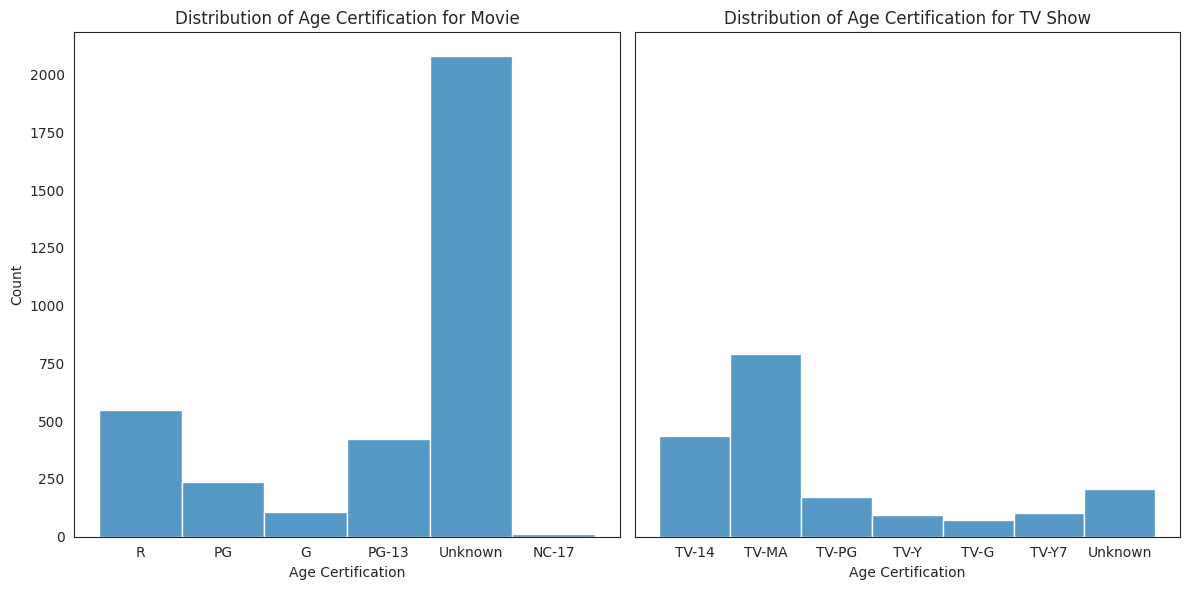

In [27]:
# Plotting with Seaborn scatterplot
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
sns.histplot(data=df[df['type'] == 'MOVIE'], x='age_certification', bins=5, kde=False, ax=axes[0])
axes[0].set_title('Distribution of Age Certification for Movie')
axes[0].set_xlabel('Age Certification')
axes[0].set_ylabel('Count')

sns.histplot(data=df[df['type'] == 'SHOW'], x='age_certification', bins=5, kde=False, ax=axes[1])
axes[1].set_title('Distribution of Age Certification for TV Show')
axes[1].set_xlabel('Age Certification')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

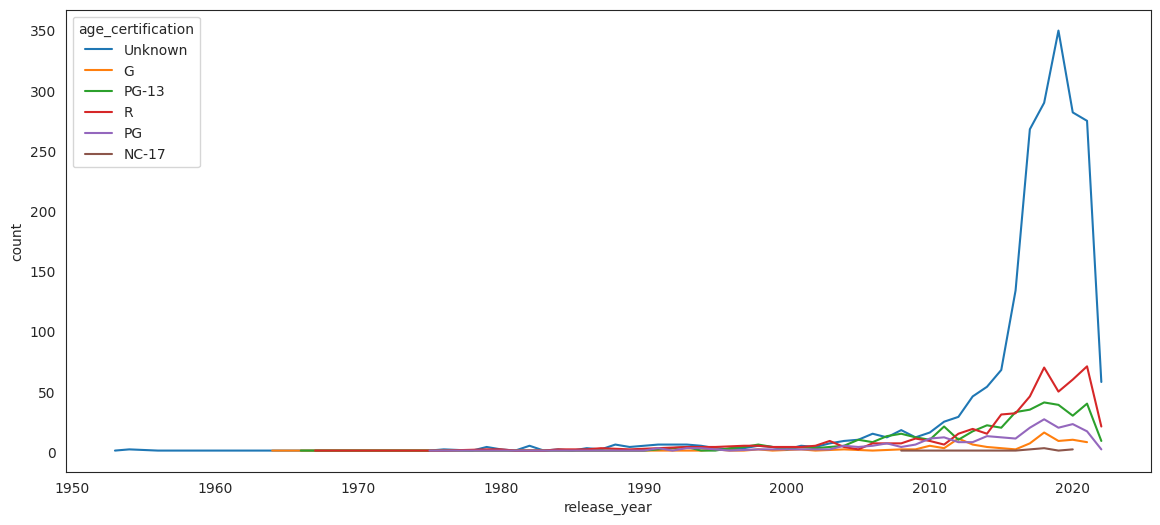

In [28]:
plt.figure(figsize=(14,6))
counts = df[df['type'] == 'MOVIE'].groupby(['release_year', 'age_certification']).size().reset_index(name='count')
sns.lineplot(data=counts, x='release_year', y='count', hue='age_certification')
plt.show()

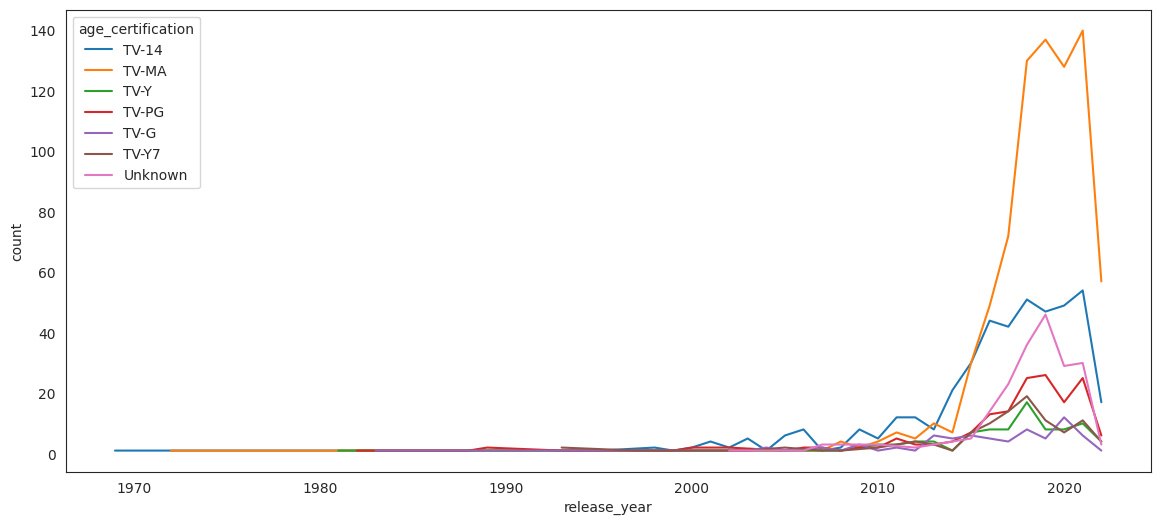

In [29]:
plt.figure(figsize=(14,6))
counts = df[df['type'] == 'SHOW'].groupby(['release_year', 'age_certification']).size().reset_index(name='count')
sns.lineplot(data=counts, x='release_year', y='count', hue='age_certification')
plt.show()

7. Show the correlation between Age Certification and IMDB Score, Age Certification and runtime

In [30]:
# Find the highest average of each runtimes, IMDB score, IMDB Votes, for Movies and TV Shows
average_runtimes = df.groupby(['age_certification', 'type']).agg({'runtime': 'mean', 'imdb_score': 'mean', 'imdb_votes': 'sum', 'title': 'count'}).reset_index()
average_runtimes = average_runtimes.sort_values(by=['runtime', 'imdb_score'], ascending=[False, False]).reset_index(drop=True)

avg_movie_score = average_runtimes[average_runtimes['type'] == 'MOVIE']['imdb_score'].idxmax()
avg_tv_score = average_runtimes[average_runtimes['type'] == 'SHOW']['imdb_score'].idxmax()
max_movie_row = average_runtimes.loc[avg_movie_score]
max_tv_row = average_runtimes.loc[avg_tv_score]

movie_count = average_runtimes[average_runtimes['type'] == 'MOVIE']['title'].idxmax()
tv_count = average_runtimes[average_runtimes['type'] == 'SHOW']['title'].idxmax()
max_movie_count = average_runtimes.loc[movie_count]
max_tv_count = average_runtimes.loc[tv_count]

movie_runtimes = average_runtimes[average_runtimes['type'] == 'MOVIE']['runtime'].idxmax()
tv_runtimes = average_runtimes[average_runtimes['type'] == 'SHOW']['runtime'].idxmax()
max_movie_runtimes = average_runtimes.loc[movie_runtimes]
max_tv_runtimes = average_runtimes.loc[tv_runtimes]

movie_votes = average_runtimes[average_runtimes['type'] == 'MOVIE']['imdb_votes'].idxmax()
tv_votes = average_runtimes[average_runtimes['type'] == 'SHOW']['imdb_votes'].idxmax()
max_movie_votes = average_runtimes.loc[movie_votes]
max_tv_votes = average_runtimes.loc[tv_votes]

# Print the output
print(f"The highest average score of age certification for Movies is {max_movie_row['age_certification']} with the score of {max_movie_row['imdb_score']}, and for TV Shows is {max_tv_row['age_certification']} with the score of {max_tv_row['imdb_score']}")
print(f"The highest number of age certification for Movies is {max_movie_count['age_certification']} with {max_movie_count['title']} movies, and for TV Shows is {max_tv_count['age_certification']} with {max_tv_count['title']} TV Shows ")
print(f"The highest average runtimes of age certification for Movies is {max_movie_runtimes['age_certification']} with {max_movie_runtimes['runtime']} minutes, and for TV Shows is {max_tv_runtimes['age_certification']} with {max_tv_runtimes['runtime']} minutes ")
print(f"The highest voted age certification for Movies is {max_movie_votes['age_certification']} with {max_movie_votes['imdb_votes']} votes, and for TV Shows is {max_tv_votes['age_certification']} with {max_tv_votes['imdb_votes']} votes ")

# Display the dataframe
average_runtimes.rename(columns={'title': 'count'}, inplace=True)
average_runtimes


The highest average score of age certification for Movies is PG-13 with the score of 6.444575471698113, and for TV Shows is TV-14 with the score of 7.262614678899083
The highest number of age certification for Movies is Unknown with 2079 movies, and for TV Shows is TV-MA with 792 TV Shows 
The highest average runtimes of age certification for Movies is PG-13 with 108.97405660377359 minutes, and for TV Shows is TV-MA with 43.52020202020202 minutes 
The highest voted age certification for Movies is R with 42344416.0 votes, and for TV Shows is TV-MA with 19179596.0 votes 


age_certification   type     runtime  imdb_score  imdb_votes  count
0              PG-13  MOVIE  108.974057    6.444575  27889552.0    424
1                  R  MOVIE  106.136861    6.321168  42344416.0    548
2                 PG  MOVIE  106.016807    6.208403   8512142.0    238
3              NC-17  MOVIE  100.230769    6.400000    209965.0     13
4                  G  MOVIE   99.390476    6.393333    808385.0    105
5            Unknown  MOVIE   98.412217    6.215969  10718329.0   2079
6              TV-MA   SHOW   43.520202    7.065909  19179596.0    792
7              TV-14   SHOW   41.176606    7.262615  10466379.0    436
8            Unknown   SHOW   39.917476    6.896117    265375.0    206
9              TV-PG   SHOW   35.366279    6.916860   1752578.0    172
10              TV-G   SHOW   26.055556    6.348611    339340.0     72
11             TV-Y7   SHOW   22.182692    6.913462    731830.0    104
12              TV-Y   SHOW   16.648936    6.547872     67809.0     94

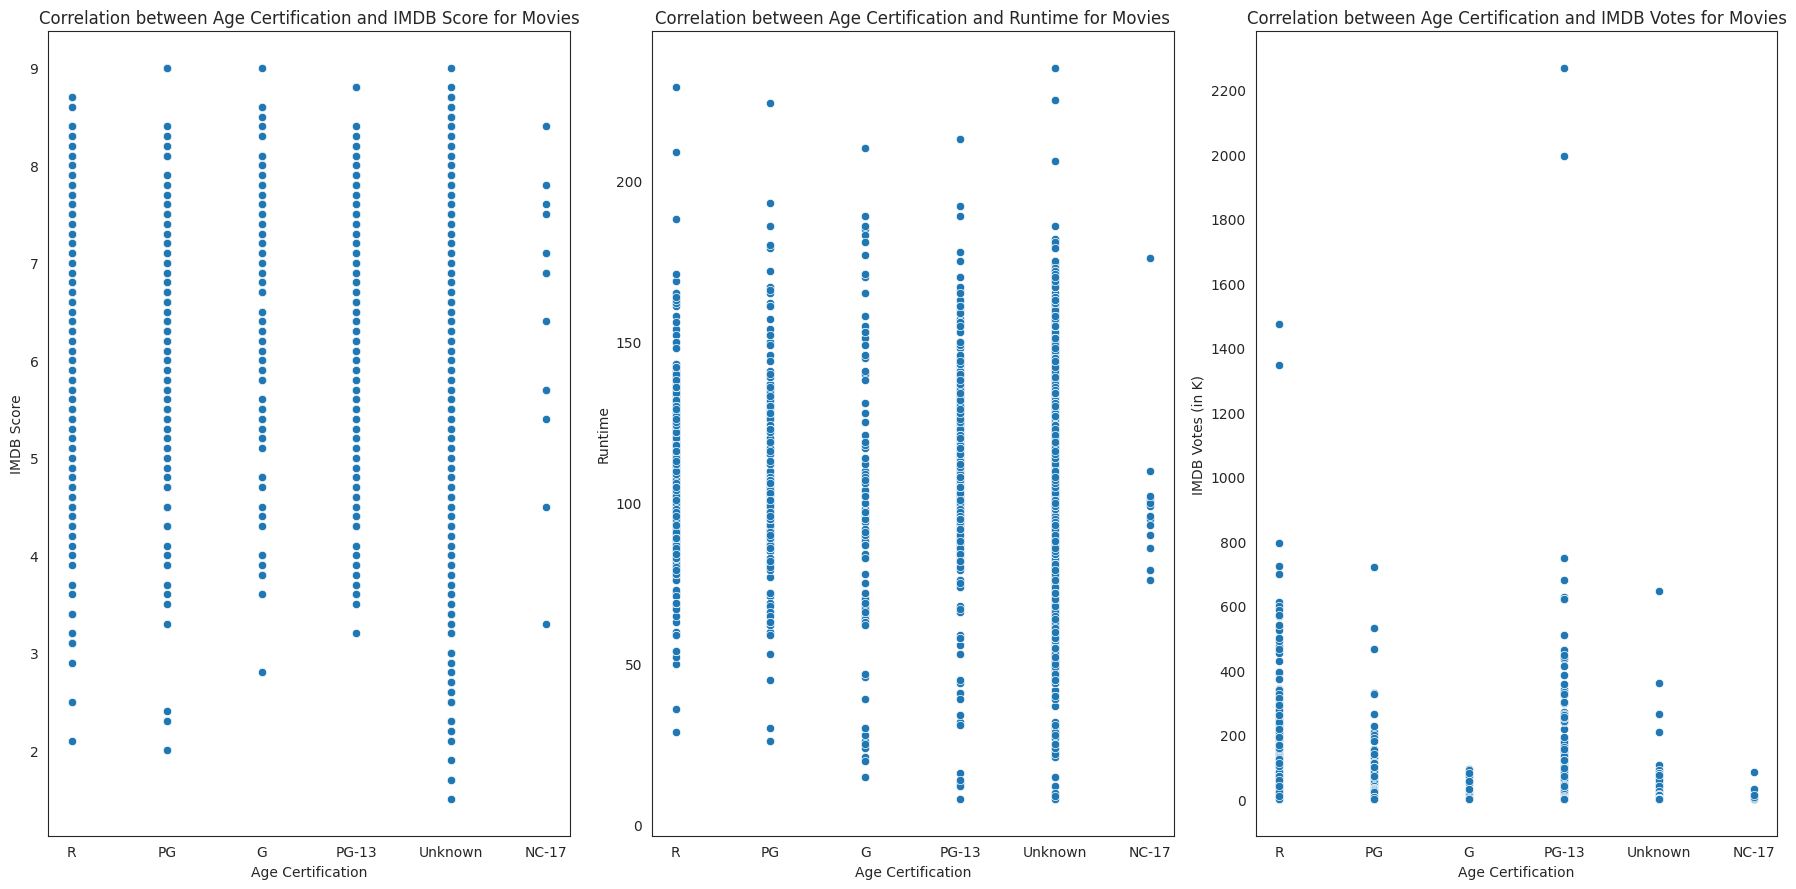

In [31]:
# Plotting using Seaborn scatterplot
fig, axes = plt.subplots(1, 3, figsize=(18, 9), sharey=False)
sns.scatterplot(data=df[df['type'] == 'MOVIE'], x='age_certification',y='imdb_score', ax=axes[0])
axes[0].set_title('Correlation between Age Certification and IMDB Score for Movies')
axes[0].set_xlabel('Age Certification')
axes[0].set_ylabel('IMDB Score')

sns.scatterplot(data=df[df['type'] == 'MOVIE'], x='age_certification',y='runtime', ax=axes[1])
axes[1].set_title('Correlation between Age Certification and Runtime for Movies')
axes[1].set_xlabel('Age Certification')
axes[1].set_ylabel('Runtime')

sns.scatterplot(data=df[df['type'] == 'MOVIE'], x='age_certification',y=df['imdb_votes']/1000, ax=axes[2])
axes[2].set_title('Correlation between Age Certification and IMDB Votes for Movies')
axes[2].set_xlabel('Age Certification')
axes[2].set_ylabel('IMDB Votes (in K)')
axes[2].set_yticks(range(0, int((df['imdb_votes']/1000).max()) + 1, 200))

plt.tight_layout()
plt.show()

8. Average runtime every year for movies and TV shows

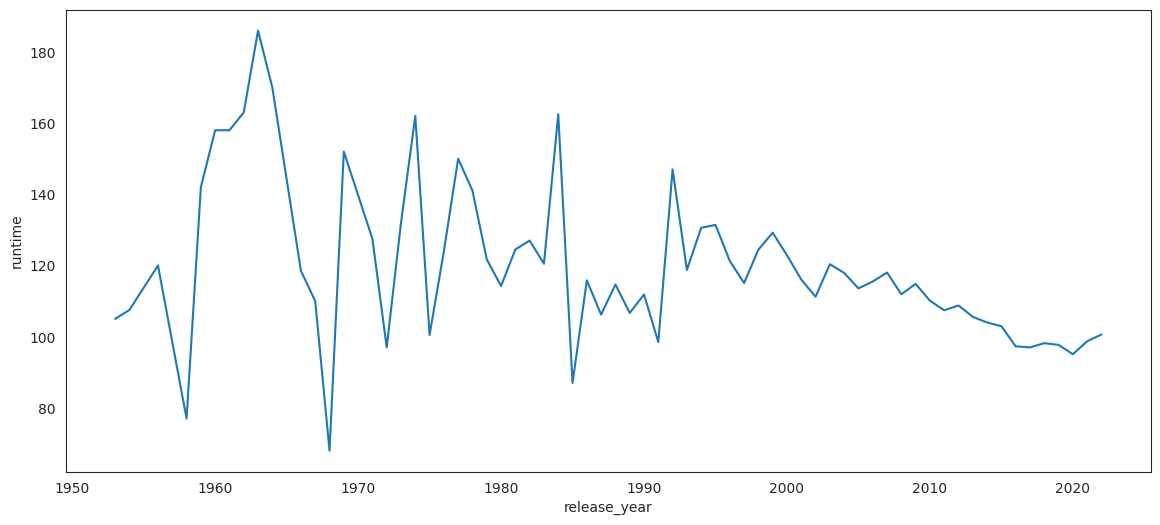

In [32]:
# Plotting using Seaborn lineplot
plt.figure(figsize=(14,6))
sns.lineplot(data=df[df['type']=='MOVIE'], x='release_year', y='runtime' ,errorbar=None)
plt.show()

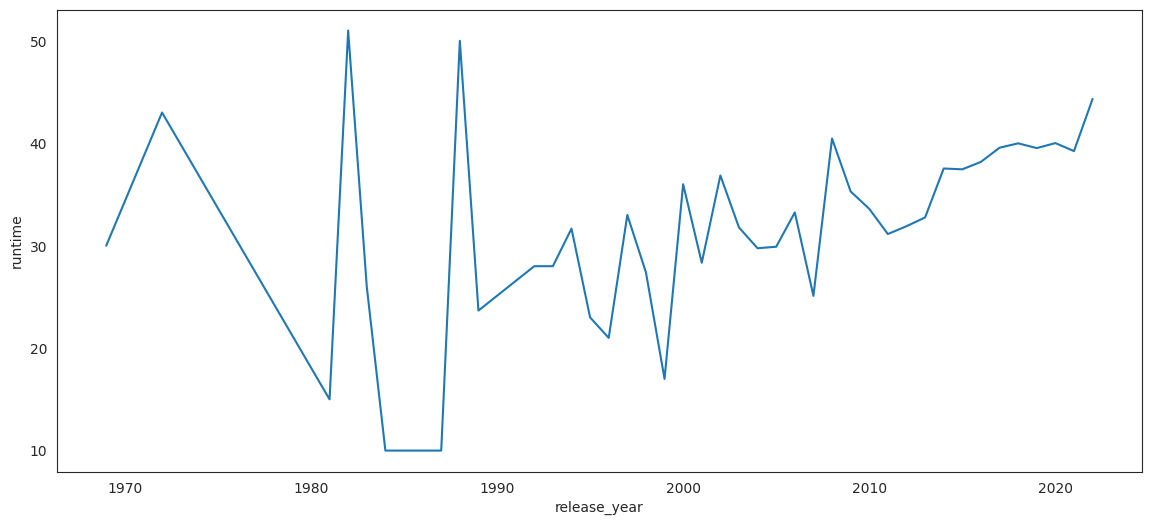

In [33]:
# Plotting using Seaborn lineplot
plt.figure(figsize=(14,6))
sns.lineplot(data=df[df['type']=='SHOW'], x='release_year', y='runtime' ,errorbar=None)
plt.show()

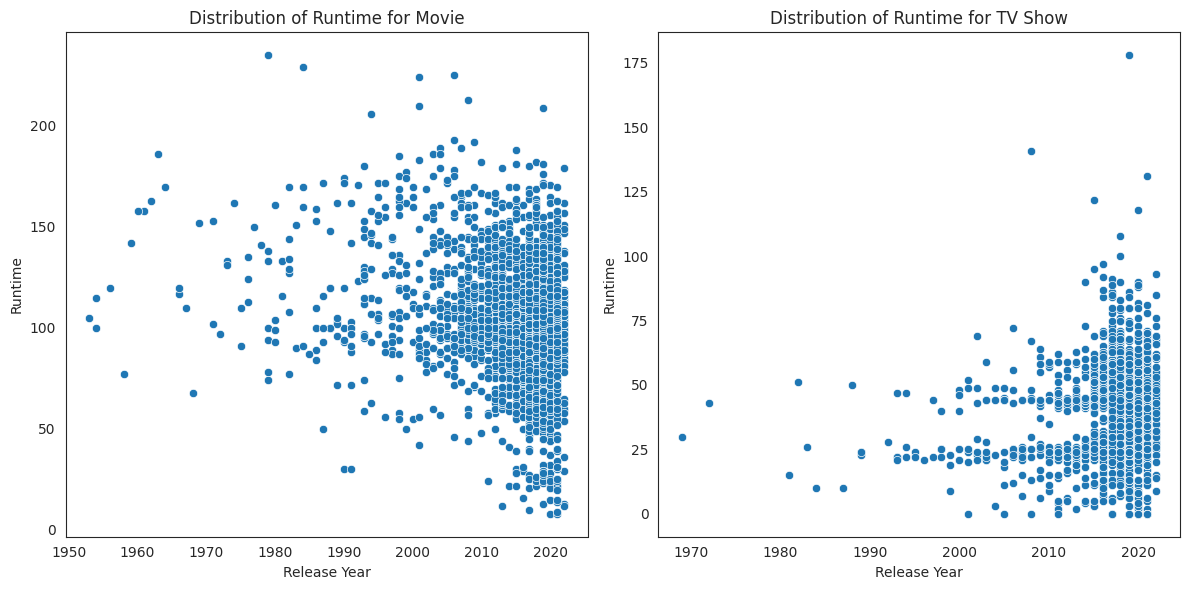

In [34]:
# Plotting using Seaborn scatterplot
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
sns.scatterplot(data=df[df['type'] == 'MOVIE'], x='release_year',y='runtime', ax=axes[0])
axes[0].set_title('Distribution of Runtime for Movie')
axes[0].set_xlabel('Release Year')
axes[0].set_ylabel('Runtime')

sns.scatterplot(data=df[df['type'] == 'SHOW'], x='release_year',y='runtime', ax=axes[1])
axes[1].set_title('Distribution of Runtime for TV Show')
axes[1].set_xlabel('Release Year')
axes[1].set_ylabel('Runtime')

plt.tight_layout()
plt.show()

In [35]:
# Display the dataframe
average_runtimes = df.groupby(['release_year', 'type'])['runtime'].mean().reset_index()
average_runtimes.sort_values(by=['release_year', 'runtime'], ascending=[False, False]).reset_index(drop=True)
 

release_year   type     runtime
0            2022  MOVIE  100.611111
1            2022   SHOW   44.326087
2            2021  MOVIE   98.722628
3            2021   SHOW   39.235507
4            2020  MOVIE   95.066339
..            ...    ...         ...
101          1959  MOVIE  142.000000
102          1958  MOVIE   77.000000
103          1956  MOVIE  120.000000
104          1954  MOVIE  107.500000
105          1953  MOVIE  105.000000

[106 rows x 3 columns]

In [36]:
# Find the top 10 longest Movies by runtime
df[df["type"]=="MOVIE"].sort_values(by="runtime", ascending=False)[:10]

title   type  release_year  \
24                       No Longer Kids  MOVIE          1979   
45          Once Upon a Time in America  MOVIE          1984   
495                 A Lion in the House  MOVIE          2006   
378   Lagaan: Once Upon a Time in India  MOVIE          2001   
428                        Jodhaa Akbar  MOVIE          2008   
423            Kabhi Khushi Kabhie Gham  MOVIE          2001   
3046                       The Irishman  MOVIE          2019   
201              Hum Aapke Hain Koun..!  MOVIE          1994   
498              Kabhi Alvida Naa Kehna  MOVIE          2006   
631                What's Your Raashee?  MOVIE          2009   

     age_certification  runtime  imdb_score  imdb_votes  decade  
24             Unknown      235         9.0       943.0    1970  
45                   R      229         8.3    342335.0    1980  
495            Unknown      225         8.7       312.0    2000  
378                 PG      224         8.1    111053.0    2000  
428              PG-13      213         7.5     32188.0    2000  
423                  G      210         7.4     48818.0    2000  
3046                 R      209         7.8    371209.0    2010  
201            Unknown      206         7.5     20986.0    1990  
498                 PG      193         6.0     19797.0    2000  
631              PG-13      192         4.8      2718.0    2000

In [37]:
# Find the top 10 longest TV Shows by runtime
df[df["type"]=="SHOW"].sort_values(by="runtime", ascending=False)[:10]

title  type  release_year age_certification  \
3598                            1994  SHOW          2019             TV-MA   
371                         Dead Set  SHOW          2008             TV-MA   
4570              Maya and the Three  SHOW          2021             TV-Y7   
1332  Sinatra: All or Nothing at All  SHOW          2015             TV-14   
4089                 Paava Kadhaigal  SHOW          2020           Unknown   
2284                        The Yard  SHOW          2018             TV-MA   
2586                     On Children  SHOW          2018           Unknown   
1398                    Intersection  SHOW          2016             TV-MA   
1346                      Reply 1988  SHOW          2015             TV-14   
4517                       jeen-yuhs  SHOW          2022             TV-MA   

      runtime  imdb_score  imdb_votes  decade  
3598      178         7.5       514.0    2010  
371       141         7.6     19684.0    2000  
4570      131         8.1      3597.0    2020  
1332      122         8.0      2354.0    2010  
4089      118         8.1      6628.0    2020  
2284      108         7.2      1605.0    2010  
2586      100         7.2       380.0    2010  
1398       97         6.7      1152.0    2010  
1346       95         9.2      6557.0    2010  
4517       93         8.1      7269.0    2020